<a href="https://colab.research.google.com/github/Rishi500/Face_Recog/blob/master/jaffe_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishi500","key":"31bae42537b6b7321ed7f577ebf60bb0"}'}

In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download 'ankur133047/modified-jaffe-facial-expression-dataset'

 54% 16.0M/29.6M [00:00<00:00, 30.3MB/s]
100% 29.6M/29.6M [00:00<00:00, 74.8MB/s]


In [0]:

!unzip -q -n /content/modified-jaffe-facial-expression-dataset.zip

In [0]:

path = 'jaffe/jaffe'

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
np.random.seed(42)
tfms = get_transforms(flip_vert=False, do_flip=True, max_rotate = 10.0, max_zoom = 1.1 )
data = ImageDataBunch.from_folder(path=path, ds_tfms = tfms, train=".",valid_pct = 0.20,
         size=256, bs = 35 , num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1', '2', '3', '4', '5', '6'], 7, 171, 42)

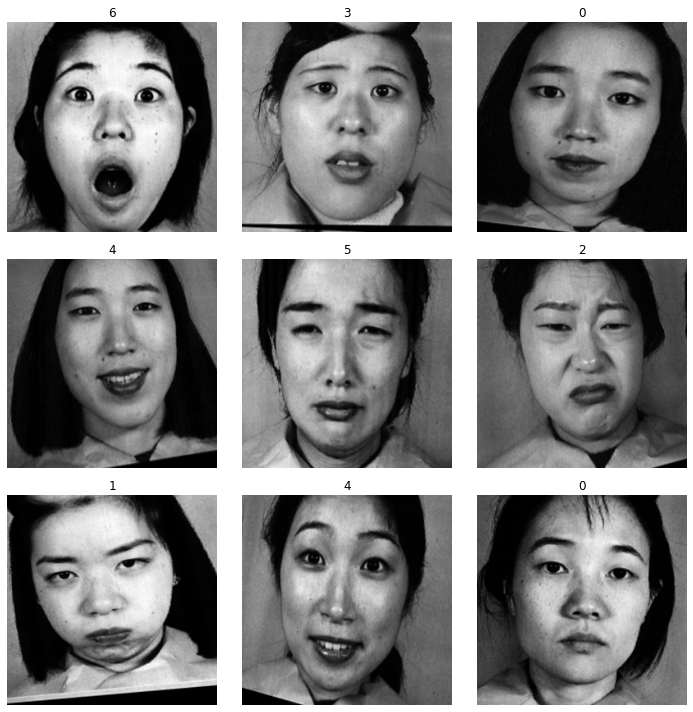

In [13]:
data.show_batch(rows=3,figsize=(10,10))

In [14]:
learner=cnn_learner(data,models.vgg19_bn,metrics=accuracy)
learner.fit_one_cycle(30)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


epoch,train_loss,valid_loss,accuracy,time
0,3.339547,1.931500,0.166667,00:06
1,3.173611,1.942469,0.285714,00:03
2,3.063468,1.897321,0.261905,00:02
3,2.845254,1.834634,0.261905,00:03
4,2.564986,1.716353,0.333333,00:02
5,2.303084,1.586129,0.333333,00:03
6,2.125002,1.411672,0.428571,00:03
7,1.952700,1.280506,0.500000,00:03
8,1.781834,1.278375,0.452381,00:03
9,1.635962,1.222177,0.523810,00:03


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


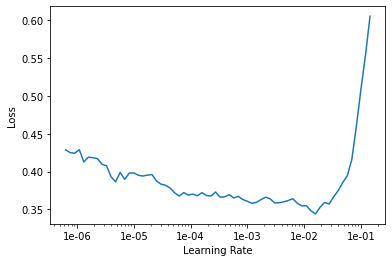

In [15]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.save('stage1')

In [0]:
learner.unfreeze()

In [18]:
learner.fit_one_cycle(30,max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.574766,1.034753,0.642857,00:04
1,0.549265,1.776539,0.595238,00:03
2,0.654609,2.814823,0.523810,00:03
3,0.790758,3.303128,0.452381,00:03
4,0.962081,10.818035,0.357143,00:03
5,0.977653,98.954498,0.142857,00:03
6,1.076252,162.572815,0.214286,00:03
7,1.166393,167.350708,0.142857,00:03
8,1.137098,79.716042,0.357143,00:03
9,1.131685,25.948172,0.357143,00:03


In [0]:
learner.save('stage2')

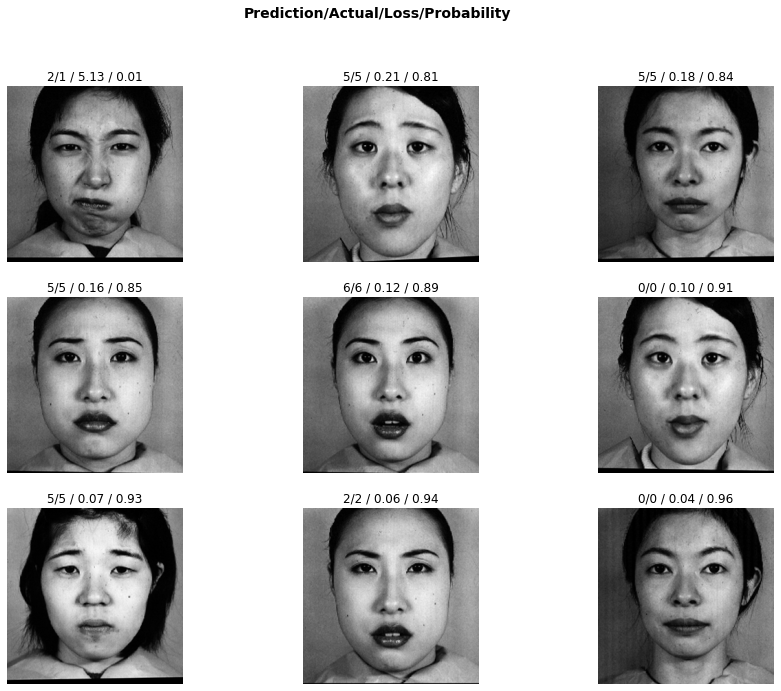

In [20]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(9, figsize=(15,11))

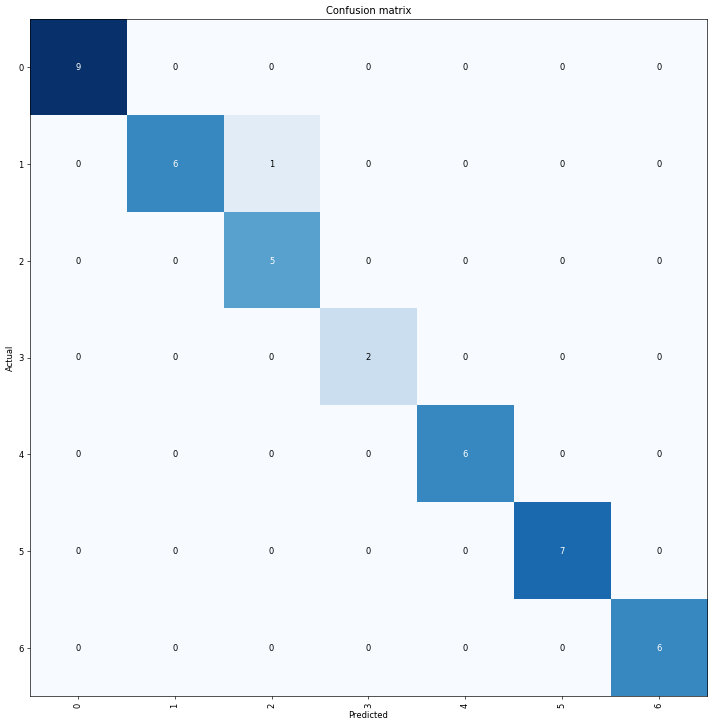

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [27]:
pred_class,pred_idx,outputs = learner.predict(img1)
print(pred_class, pred_idx, outputs)

5 tensor(5) tensor([0.0018, 0.3397, 0.0506, 0.1138, 0.0284, 0.4612, 0.0046])
